![CDS 411 logo](../../img/cds-411-logo.png)

# Class 10: System dynamics models: Drug dosage II

---

![CC BY-SA 4.0 license](../../img/cc-by-sa.png)

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

## Load packages

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### System dynamics diagram

<center><img width="50%" src="../../img/dilantin_system_dynamics_model.png"></center>

### Model constants

In [2]:
sim_time = 168  # hours
delta_t = 0.01  # hours
sim_steps = int(sim_time / delta_t)
half_life = 22  # hours
dose_interval = 8  # hours
dose_steps = int(dose_interval / delta_t)
absorption_constant = 0.12
serum_volume = 3000  # milliliters
dosage = 100 * 1000  # micrograms
elimination_constant = -np.log(2) / half_life  # inverse hours
mec = 10  # micrograms per milliliter
mtc = 20  # micrograms per milliliter

### Simulation trace

In [3]:
serum_concentration = [[0, 0]]

### Finite difference equation

Standard `for` loop for unconstrained decay with time impulse modification

In [4]:
dilantin_in_system = absorption_constant * dosage
for step_index in range(1, sim_steps + 1):
    if step_index % dose_steps == 0:
        dilantin_in_system += absorption_constant * dosage
    
    elimination = elimination_constant * dilantin_in_system
    dilantin_in_system += elimination * delta_t
    serum_concentration.append([step_index, dilantin_in_system / serum_volume])

Don't forget to convert your results to a data frame!

In [5]:
simulation_df = pd.DataFrame({
    "step": [x[0] for x in serum_concentration],
    "serum": [x[1] for x in serum_concentration],
})
simulation_df["time"] = simulation_df["step"] * delta_t

### Visualization

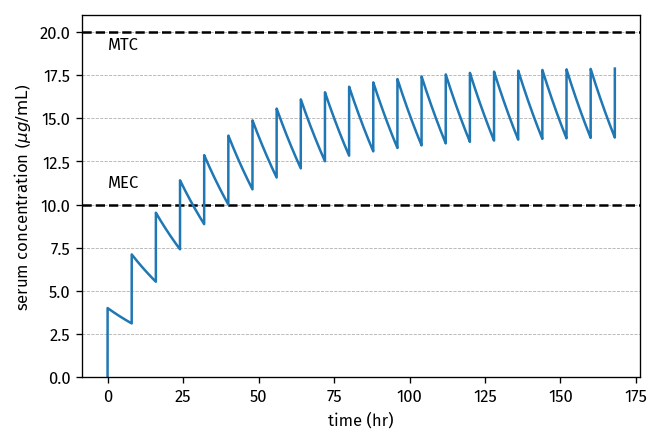

In [6]:
fig, ax = plt.subplots(dpi=120)  # Use dpi to change figure size in notebooks
ax.axhline(mec, color="k", linestyle="--")  # Plots MEC minimum line
ax.axhline(mtc, color="k", linestyle="--")  # Plots MTC maximum line
ax.plot(simulation_df["time"], simulation_df["serum"].values, "-")
ax.text(0, mec + 1, "MEC")
ax.text(0, mtc - 1, "MTC")
ax.set_ylim(bottom=0)
ax.set_xlabel("time (hr)")
ax.set_ylabel(r"serum concentration $(\mu{}g/\mathrm{mL})$");

### Homework problem

Module 2.5, project 3, page 55

> In an attempt to raise the concentration of a drug in the sytem to the minimum effective concentration quickly, sometimes doctors give a patient a **loading dose**, which is an initial dosage that is much higher than the maintenance dosage. A loading dose for Dilantin is three doses - 400 mg, 300 mg, and 300 mg two hours apart. Twenty-four hours after the loading dose, normal dosage of 100 mg every 8 hours begins. Develop a model for this dosage regime.